In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [47]:
annonces = pd.read_csv("annonces_completes_notaires.csv")

Aucun doublon

In [48]:
annonces.duplicated().sum()

np.int64(0)

Aucune valeur manquante (sauf pour la variable "Surface_m2")

In [49]:
annonces.isna().sum()

Departement       0
URL               0
Titre             0
Type_Bien         0
Localisation      0
Prix              0
Surface_m2      150
Nb_Pieces         0
Description       0
dtype: int64

In [50]:
annonces["Prix"].describe()

count    1.292000e+03
mean     3.462838e+05
std      3.957543e+05
min      1.900000e+04
25%      1.562825e+05
50%      2.499000e+05
75%      3.974000e+05
max      4.935000e+06
Name: Prix, dtype: float64

Récupération de la surface dans la description, si possible

In [51]:
#Définition du motif Regex
# Explication: (\d+(?:[.,]\d+)?) capture le nombre (entier ou décimal)
# \s* gère l'espace éventuel
# m² est l'unité
pattern = r"(\d+(?:[.,]\d+)?)\s*m²"

In [52]:
#Extraction de la surface depuis la description
# expand=False permet de retourner une Série (colonne) plutôt qu'un DataFrame
extracted_surface = annonces['Description'].str.extract(pattern, expand=False)

# On remplace les virgules par des points pour que Python comprenne que c'est un chiffre
extracted_surface = extracted_surface.str.replace(',', '.')

In [53]:
annonces['Surface_m2'] = annonces['Surface_m2'].fillna(extracted_surface)

In [54]:
#conversion au format numérique pour avoir des float
annonces['Surface_m2'] = pd.to_numeric(annonces['Surface_m2'],errors='coerce')

Il reste 57 valeurs manquantes

In [55]:
annonces['Surface_m2'].isna().sum()

np.int64(57)

In [56]:
annonces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departement   1292 non-null   int64  
 1   URL           1292 non-null   object 
 2   Titre         1292 non-null   object 
 3   Type_Bien     1292 non-null   object 
 4   Localisation  1292 non-null   object 
 5   Prix          1292 non-null   int64  
 6   Surface_m2    1235 non-null   float64
 7   Nb_Pieces     1292 non-null   int64  
 8   Description   1292 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 91.0+ KB


Mise à jour du dataset

In [57]:
# annonces.to_csv("immobilier_propre.csv", index=False, encoding='utf-8-sig')

Traitement des données manquantes restantes de manière manuelle. Voici le résultat obtenu :

In [58]:
immo = pd.read_csv("immobilier_propre.csv")

In [60]:
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departement   1292 non-null   int64  
 1   URL           1292 non-null   object 
 2   Titre         1292 non-null   object 
 3   Type_Bien     1292 non-null   object 
 4   Localisation  1292 non-null   object 
 5   Prix          1292 non-null   int64  
 6   Surface_m2    1292 non-null   float64
 7   Nb_Pieces     1292 non-null   int64  
 8   Description   1292 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 91.0+ KB


Rajout des colonnes "Ville" et "prix_m2"

In [61]:
def ajout_colonnes(df):

    def nettoyer_localisation(texte):

        # 1. On retire le tiret et l'espace du début ("- ")
        # lstrip('- ') retire ces caractères s'ils sont au début
        texte_propre = texte.lstrip('- ').strip()

        # 2. On coupe la chaîne au séparateur " - " (qui sépare la ville du département)
        # Exemple : "Paris 12 - Paris (75)" devient ["Paris 12", "Paris (75)"]
        # On prend l'élément [0]
        if " - " in texte_propre:
            ville = texte_propre.split(' - ')[0]
        else:
            ville = texte_propre

        return ville.strip()

    # Création de la colonne Ville
    df['Ville'] = df['Localisation'].apply(nettoyer_localisation)

    # Création de la colonne prix_m2
    df['prix_m2'] = df['Prix'] / df['Surface_m2']
    # Arrondi à 2 décimales
    df['prix_m2'] = df['prix_m2'].round(2)

    return df

if __name__ == "__main__":
    fichier_csv = "immobilier_propre.csv"

    try:
        # Chargement
        df = pd.read_csv(fichier_csv)

        # Traitement
        df = ajout_colonnes(df)

        # Sauvegarde
        df.to_csv("immo_final.csv", index=False)

    except Exception as e:
        print(f"Erreur : {e}")

Après nettoyage

Comment le prix au mètre carré varie-t-il selon le département, la surface et le type de bien immobilier en France ?

In [62]:
# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [63]:
immo_f = pd.read_csv("immo_final.csv")

In [64]:
immo_f.head()

,Departement,URL,Titre,Type_Bien,Localisation,Prix,Surface_m2,Nb_Pieces,Description,Ville,prix_m2
0,75,https://www.immobilier.notaires.fr/fr/annonce-...,Achat :Appartement T4- Paris 8 - Paris (75),Appartement T4,- Paris 8 - Paris (75),955000,72.12,4,Notaire - F4 Rue Berryer PARIS VIIIème. Au coe...,Paris 8,13241.82
1,75,https://www.immobilier.notaires.fr/fr/annonce-...,Achat :Appartement T2- Paris 16 - Paris (75),Appartement T2,- Paris 16 - Paris (75),745500,70.00,2,Notaire vend un appartement T2 de 70.58m² Carr...,Paris 16,10650.00
2,75,https://www.immobilier.notaires.fr/fr/annonce-...,Achat :Appartement T4- Paris 15 - Paris (75),Appartement T4,- Paris 15 - Paris (75),600000,74.15,4,"Exclusivité, au sein d'un bel immeuble d'angle...",Paris 15,8091.71
3,75,https://www.immobilier.notaires.fr/fr/annonce-...,Vente en viager :Appartement T3- Paris 14 - Pa...,Appartement T3,- Paris 14 - Paris (75),995000,87.59,3,VENTE DE LA NUE-PROPRIÉTÉ\nPrix : 995 000 € FA...,Paris 14,11359.74
4,75,https://www.immobilier.notaires.fr/fr/annonce-...,Achat :Appartement T8- Paris 16 - Paris (75),Appartement T8,- Paris 16 - Paris (75),2961150,245.96,8,Paris 16e – La Muette / Passy\nAppartement de ...,Paris 16,12039.15


In [65]:
#simplification du type de logement en 2 catégories : Maison et appartement

def simplifier_type(val):
    val = str(val).lower()
    if 'appartement' in val: return 'Appartement'
    if 'maison' in val or 'villa' in val: return 'Maison'
    return 'Autre'

immo_f['Type'] = immo_f['Type_Bien'].apply(simplifier_type)

In [66]:
# Calcul des statistiques par département
stats_dept = immo_f.groupby('Departement')['prix_m2'].agg(['mean', 'median', 'min', 'max', 'count'])
stats_dept = stats_dept.sort_values(by='mean', ascending=False)

# Renommer les colonnes pour faire propre
stats_dept.columns = ['Moyenne (€/m²)', 'Médiane (€/m²)', 'Min', 'Max', 'Nombre de biens']

# Affichage
stats_dept.round(2)

,Moyenne (€/m²),Médiane (€/m²),Min,Max,Nombre de biens
Departement,,,,,
75,11939.29,10814.59,5447.87,29981.08,59
6,6341.29,5376.21,1927.43,16740.88,56
83,4808.13,4244.68,1103.96,9576.32,57
74,4807.31,4466.58,773.07,27500.00,53
69,3672.38,3489.43,1516.67,7990.78,60
13,3659.39,3273.90,1472.22,10862.07,56
34,3644.44,3188.02,241.82,22222.22,59
33,3535.32,3294.39,855.91,10775.19,59
1,3406.95,3294.68,557.75,6428.89,60


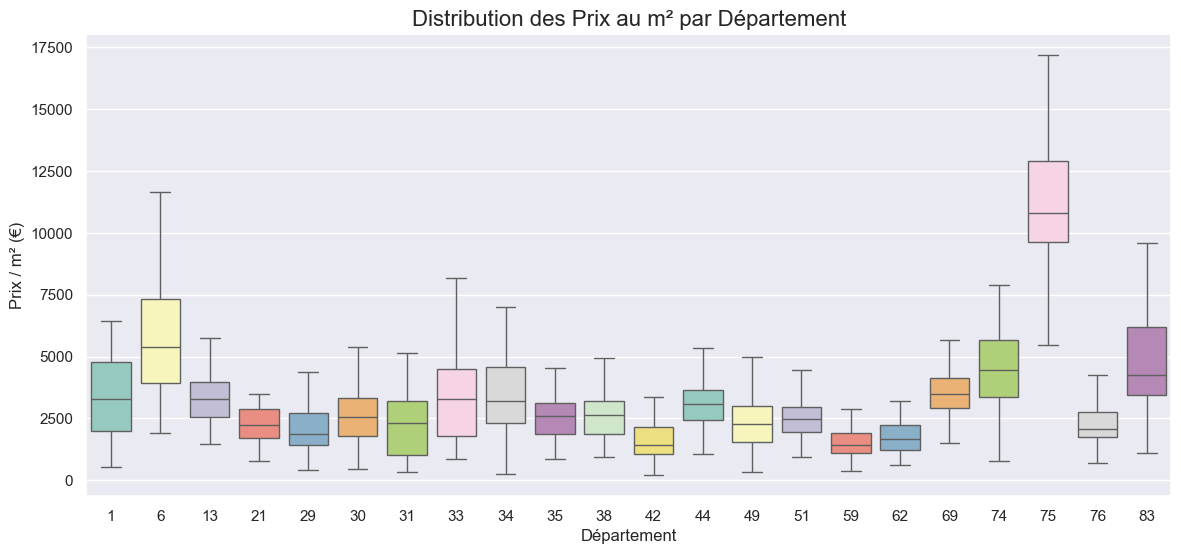

In [67]:
plt.figure(figsize=(14, 6))

# Création du Boxplot
sns.boxplot(x='Departement', y='prix_m2', data=immo_f, showfliers=False, palette="Set3", hue='Departement',legend=False)

plt.title('Distribution des Prix au m² par Département', fontsize=16)
plt.ylabel('Prix / m² (€)')
plt.xlabel('Département')
plt.show()

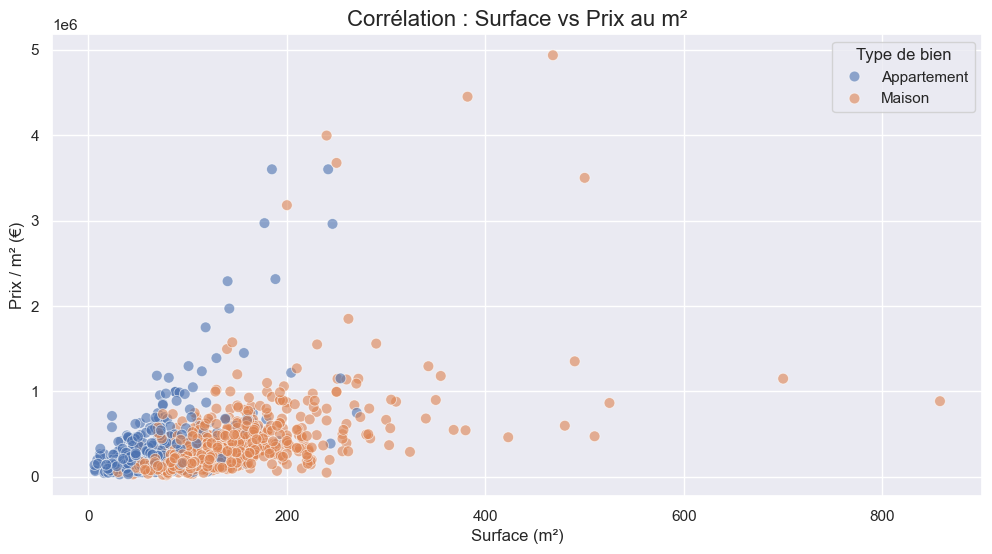

In [68]:
plt.figure(figsize=(12, 6))

# Nuage de points
sns.scatterplot(
    data=immo_f,
    x='Surface_m2',
    y='Prix',
    hue='Type', # Couleurs différentes pour Maison/Appart
    alpha=0.6,
    s=60
)

plt.title('Corrélation : Surface vs Prix au m²', fontsize=16)
plt.xlabel('Surface (m²)')
plt.ylabel('Prix / m² (€)')
plt.legend(title='Type de bien')
plt.show()

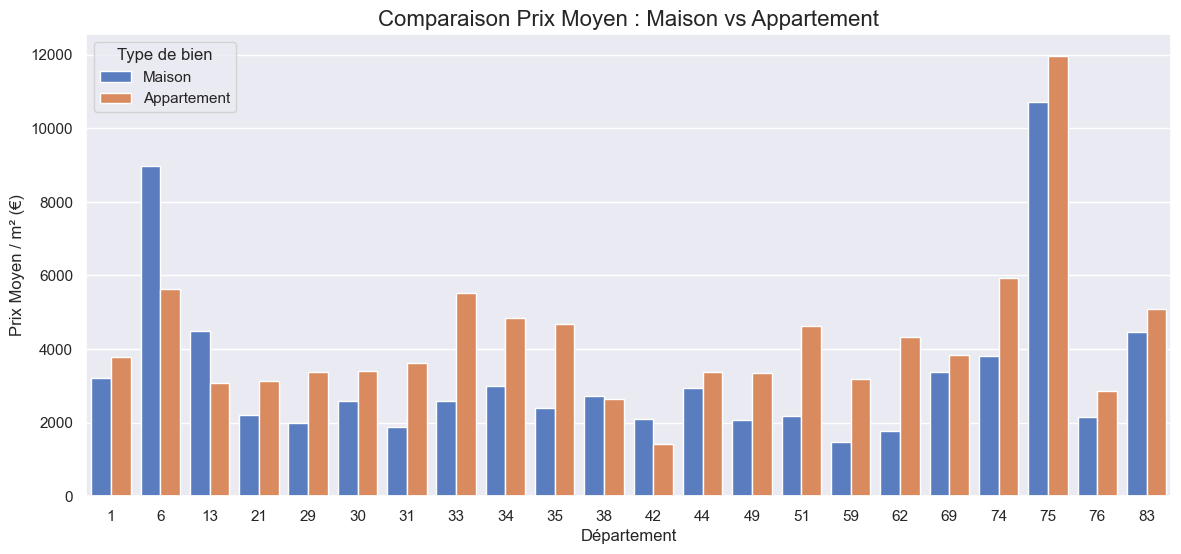

In [69]:
plt.figure(figsize=(14, 6))

# Barplot comparatif
sns.barplot(
    data=immo_f,
    x='Departement',
    y='prix_m2',
    hue='Type',
    errorbar=None,
    palette="muted"
)

plt.title('Comparaison Prix Moyen : Maison vs Appartement', fontsize=16)
plt.ylabel('Prix Moyen / m² (€)')
plt.xlabel('Département')
plt.legend(title='Type de bien')
plt.show()

In [70]:
# Création du graphique interactif
fig = px.scatter(
    immo_f,
    x="Surface_m2",
    y="Prix",
    hover_data=['Ville', 'Nb_Pieces'], # Infos affichées au survol
    title="Prix vs Surface",
    opacity=0.7,
    width=1000,
    height=800
)

fig.show()

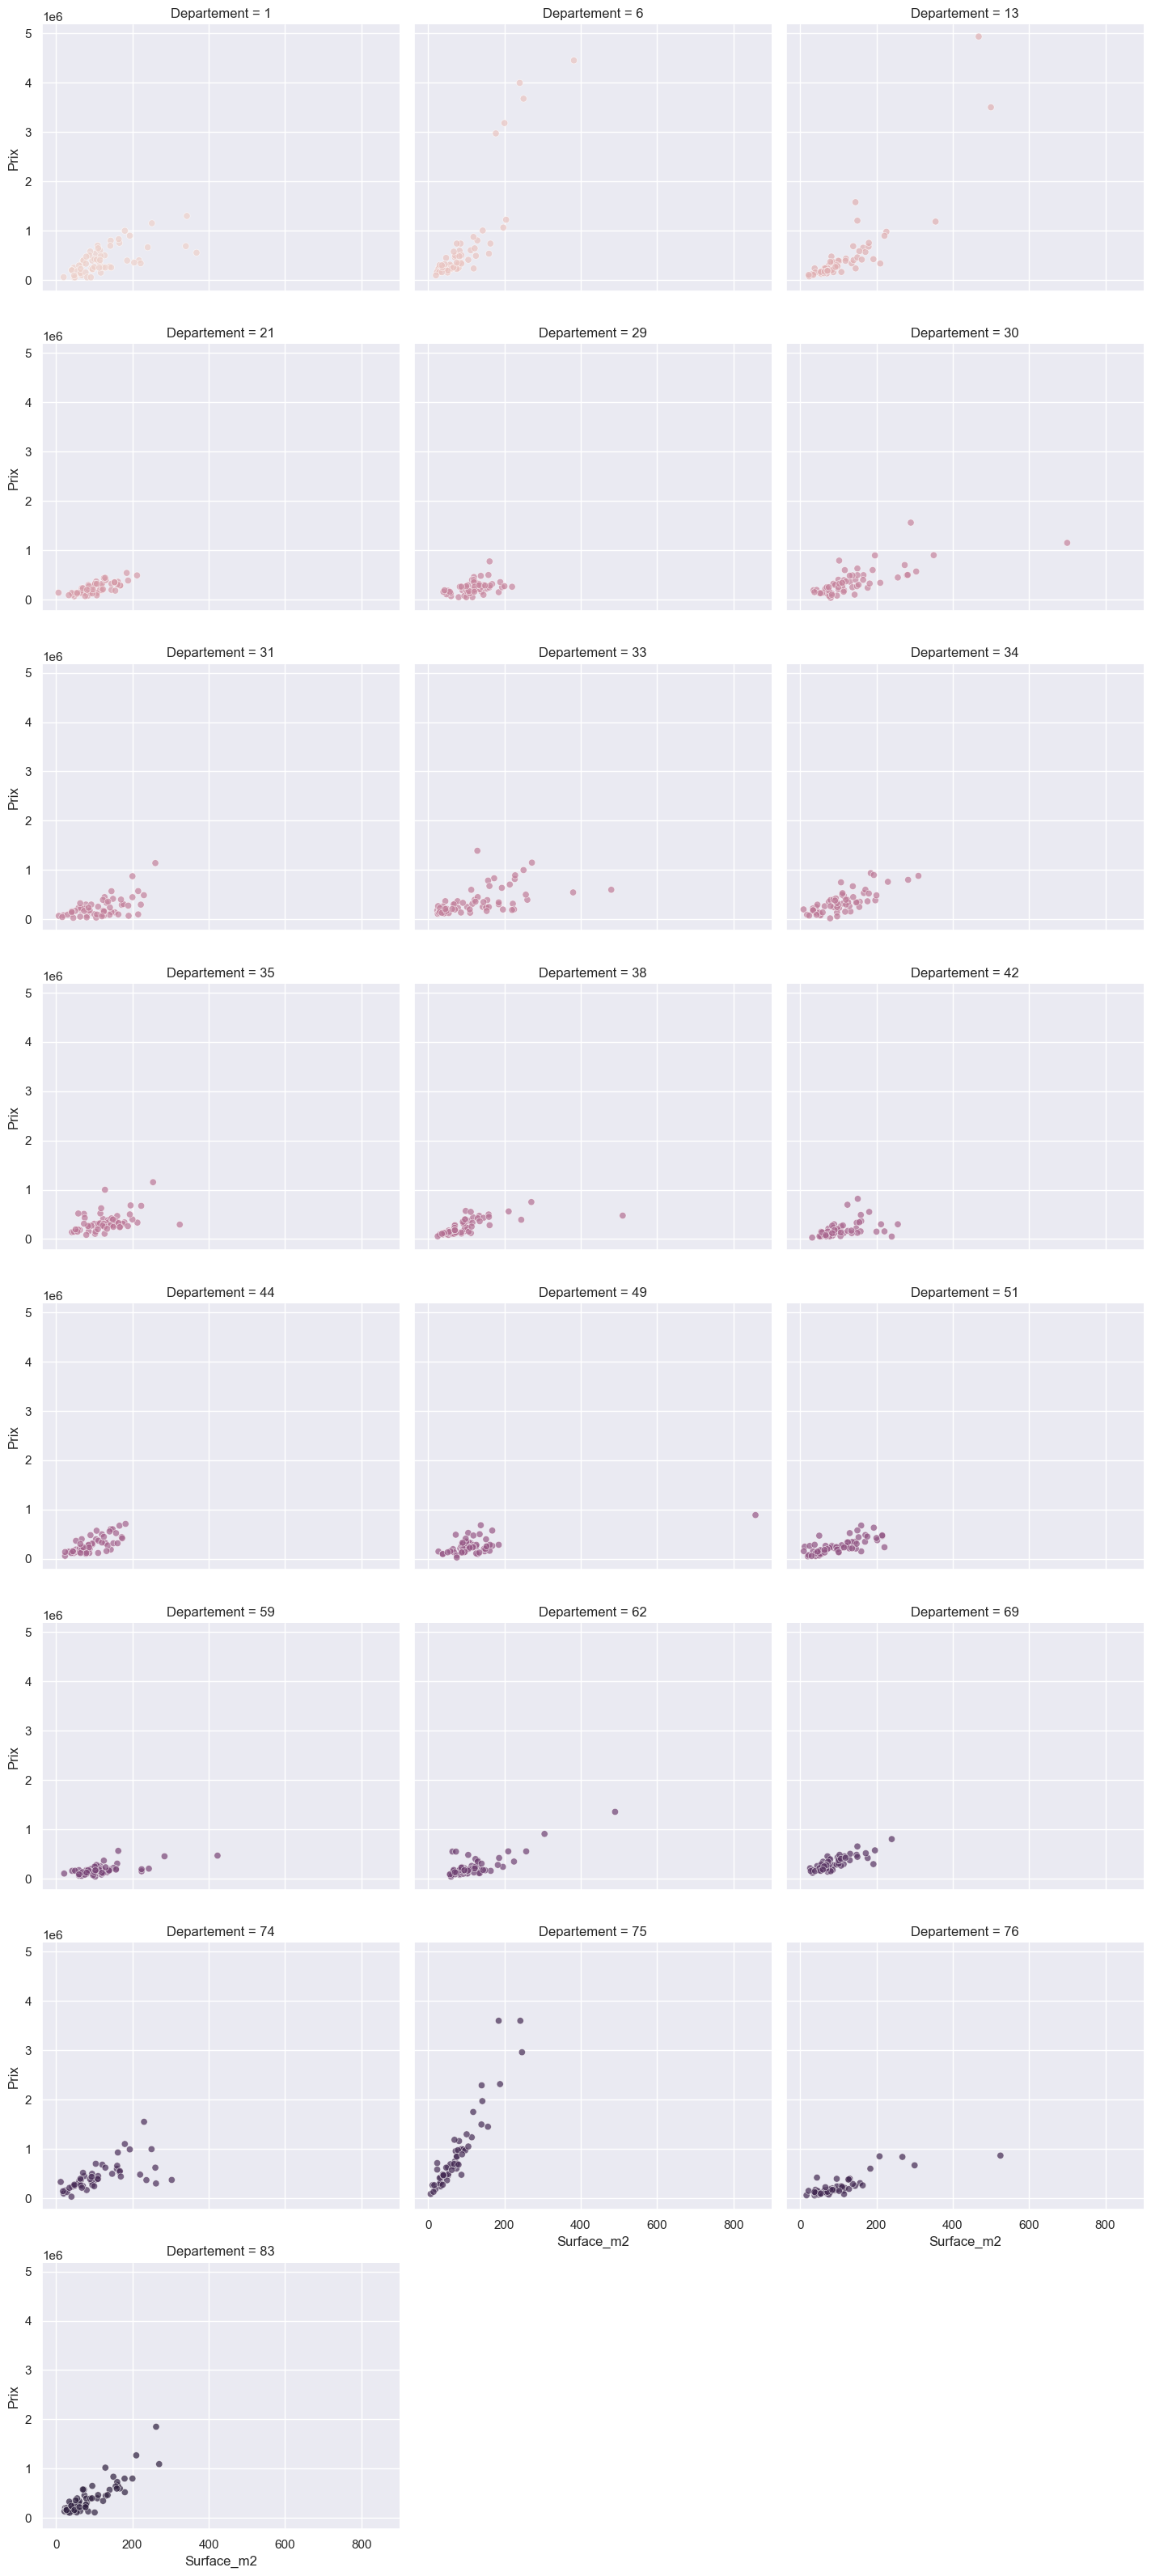

In [71]:
# Cette commande crée automatiquement une grille de graphiques
sns.relplot(
    data=immo_f,
    x='Surface_m2',
    y='Prix',
    col='Departement',  # Crée un graphique distinct par département
    hue='Departement',
    col_wrap=3,         # Affiche 3 graphiques par ligne
    height=4,           # Hauteur de chaque petit graphique
    aspect=1.2,
    alpha=0.7,
    legend=False,
)

plt.show()